In [75]:
import pandas as pd
import pycountry as pyc
import pycountry_convert as pycc
import numpy as np
import re

df = pd.read_csv('coup_data.csv')#, keep_date_col=True, parse_dates= {"date" : ["Year","Month","Day"]})

df.keys()

Index(['Unnamed: 0', 'COW', 'Old Coup ID#', 'New Coup ID#', 'country', 'Month',
       'Day', 'Year', 'Coup ID Type', 'Description of Event',
       'Milan Description', 'Realized', 'Unrealized', 'Removed/ Targeted Name',
       'Removed Title/ Position', 'Initiator/ Suspected',
       'Ascended Name/ Suspected', 'Ascended/ Suspected Title/ Position',
       'Event Summary', 'iso2', 'continent', 'datetime'],
      dtype='object')

In [97]:
df = df.rename(columns={'Description of Event': 'event', 'Coup ID Type': 'coup_id', 'Year': 'year',\
                        'Month': 'month', 'Day': 'day', 'Realized': 'realized'})

In [98]:
df['coup_id'].unique(), df['event'].unique()

(array(['Coup', '0', 'Civil War', 'Foreign', 'Counter-Coup', 'Palace Coup',
        'Revolt', 'Palace Coup/ Auto Coup', 'Palace Coup/Auto Coup',
        'Auto-Coup', nan], dtype=object),
 array(['coup', 'attempted coup', 'conspiracy coup', 'coup attempt',
        'auto coup'], dtype=object))

In [99]:
df = df.dropna(subset=['event', 'iso2'], thresh=2)

In [100]:
def get_continent(iso2):
    continent = pycc.country_alpha2_to_continent_code(iso2)
    return continent

In [101]:
df['continent'] = df.apply(lambda r: get_continent(r.iso2), axis=1)
df['continent'].unique()

array(['AS', 'EU', 'AF', 'SA', 'NA', 'OC'], dtype=object)

In [102]:
check = df[df.continent.isin(['AS', 'EU', 'AF', 'SA', 'OC', 'NA']) == False]
check['country'].unique()

array([], dtype=object)

In [103]:
df = df.dropna(subset=['event', 'continent', 'year', 'month', 'day'], thresh=5)
len(df)

949

In [104]:
def get_digit(string):
    #print(string)
    try:
        text = ''.join(ch for ch in string if ch.isdigit())
        print (text)
        return int(text)
    except:
        return int(string)

In [105]:
df['year'] = df.apply(lambda r:  get_digit(r.year), axis=1)
df['month'] = df.apply(lambda r: get_digit(r.month), axis=1)
df['day'] = df.apply(lambda r:  get_digit(r.day), axis=1)

In [106]:
df= df[df['year'] > 1900]

len(df)

949

In [107]:
df['event'].unique()

array(['coup', 'attempted coup', 'conspiracy coup', 'coup attempt',
       'auto coup'], dtype=object)

In [108]:
df['event'] = df.apply(lambda r: r.event.lower(),axis=1)
df['event'].unique()

array(['coup', 'attempted coup', 'conspiracy coup', 'coup attempt',
       'auto coup'], dtype=object)

In [109]:
df.keys()

Index(['Unnamed: 0', 'COW', 'Old Coup ID#', 'New Coup ID#', 'country', 'month',
       'day', 'year', 'coup_id', 'event', 'Milan Description', 'realized',
       'Unrealized', 'Removed/ Targeted Name', 'Removed Title/ Position',
       'Initiator/ Suspected', 'Ascended Name/ Suspected',
       'Ascended/ Suspected Title/ Position', 'Event Summary', 'iso2',
       'continent', 'datetime', 'date'],
      dtype='object')

In [110]:
cols=['year', 'month', 'day']
df[cols]

,year,month,day
0,1963,3,10
1,1973,7,17
2,1973,9,20
3,1973,11,30
4,1973,12,0
...,...,...,...
1053,1993,3,0
1054,1997,10,28
1055,1995,10,0
1056,1998,12,0


In [111]:
df = df[(df['month']) != 0 & (df['day'] != 0)]
len(df)

949

In [112]:
def get_date(row):
    datetime = str(row[cols[0]]) + '-' + str(row[cols[1]]) #+ '-' + str(row[cols[2]])
    return datetime


In [113]:
df['date'] = df.apply(lambda r: get_date(r), axis=1)
df['datetime']=pd.to_datetime(df['date'])
df['datetime']

0      1963-03-01
1      1973-07-01
2      1973-09-01
3      1973-11-01
4      1973-12-01
          ...    
1053   1993-03-01
1054   1997-10-01
1055   1995-10-01
1056   1998-12-01
1057   2001-05-01
Name: datetime, Length: 949, dtype: datetime64[ns]

## Successful coup?

In [115]:
df['realized'] = df.apply(lambda r: 'Yes' if r.realized == 1.0 else 'No', axis=1)

In [116]:
df['realized']

0       Yes
1       Yes
2        No
3        No
4        No
       ... 
1053     No
1054     No
1055     No
1056     No
1057     No
Name: realized, Length: 949, dtype: object

## SWARMPLOT

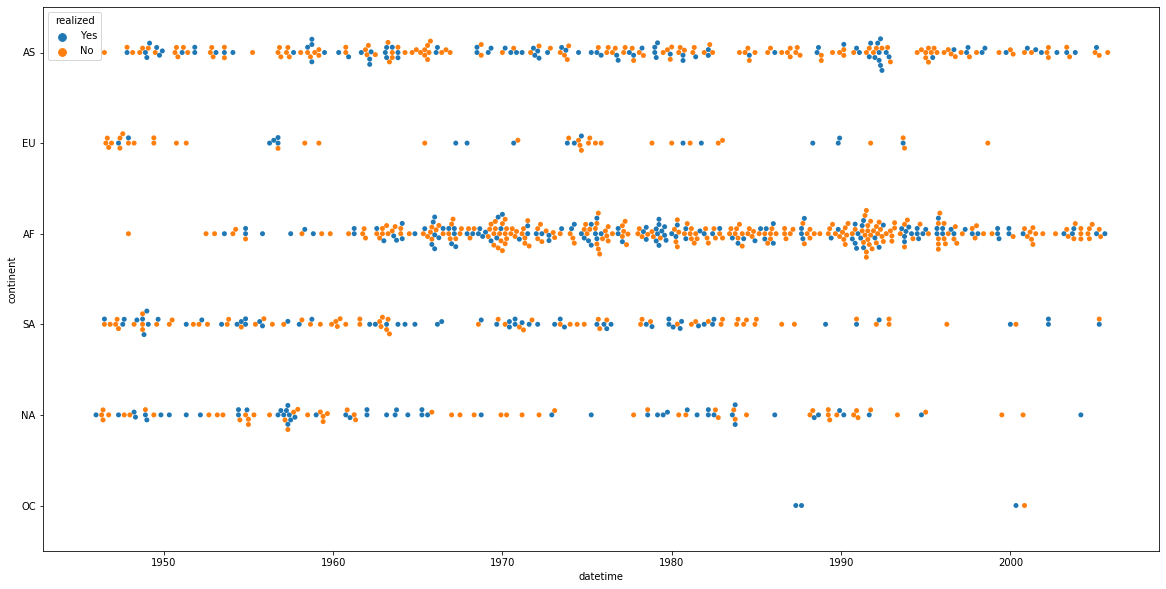

In [122]:
import seaborn as sns
#sns.set_theme(style="whitegrid")
# tips = sns.load_dataset("tips")
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize=(20, 10))
ax = sns.swarmplot(x="datetime", y="continent", data=df, hue="realized")

## Asia only

In [133]:
asia = df[df.continent =='AS']
len(asia)

244

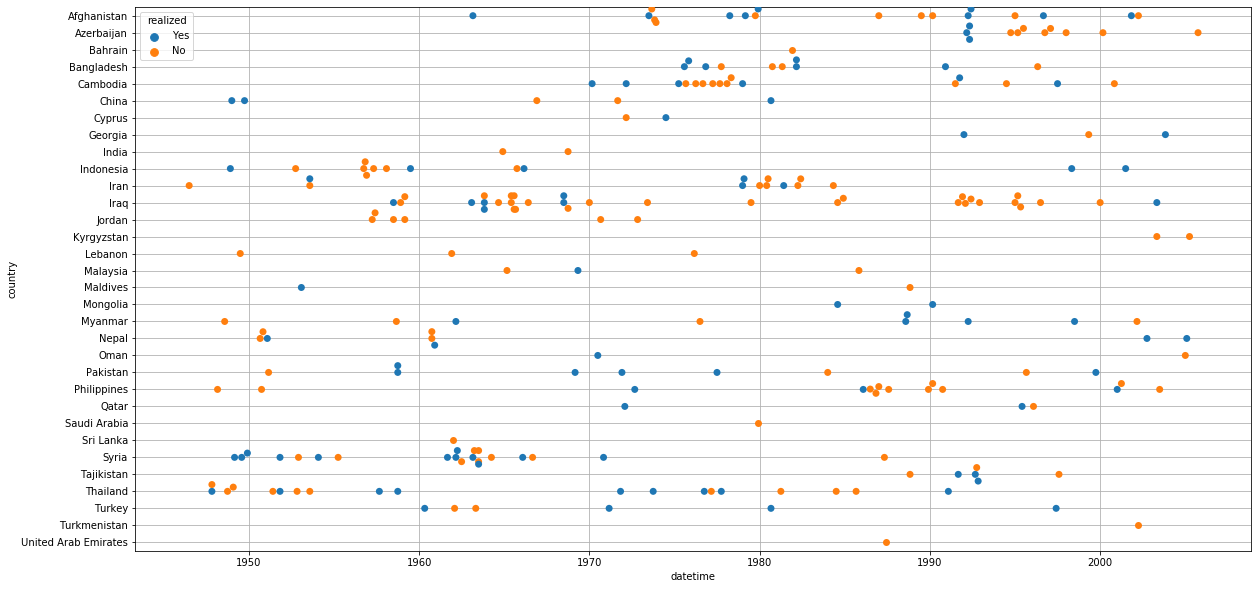

In [140]:
fig, ax = plt.subplots(1,1, figsize=(20, 10))
ax = sns.swarmplot(x="datetime", y="country", data=asia, hue="realized",  size=7)
plt.grid()

In [135]:
sea = ['Thailand', 'Myanmar', 'Philippines', 'Malaysia', 'Indonesia', 'Cambodia', 'Cambodia', 'Laos', 'Brunei', 'Singapore']

In [136]:
asia

,Unnamed: 0,COW,Old Coup ID#,New Coup ID#,country,month,day,year,coup_id,event,...,Removed/ Targeted Name,Removed Title/ Position,Initiator/ Suspected,Ascended Name/ Suspected,Ascended/ Suspected Title/ Position,Event Summary,iso2,continent,datetime,date
0,1,700.0,70031063,7.000310e+10,Afghanistan,3,10,1963,Coup,coup,...,Sardar Mohammad Daoud,prime minister,Zahir Shah,King Mohammud Zahir Shah,royal ruler,A policy dispute resulted in the forced resign...,AF,AS,1963-03-01,1963-3
1,2,700.0,70071773,7.000717e+10,Afghanistan,7,17,1973,Coup,coup,...,King Mohammud Zahir Shah,royal ruler,General Mohammud Daoud Khan,General Mohammud Daoud Khan,president,General Mohammud Daoud Khan overthrew the mona...,AF,AS,1973-07-01,1973-7
2,3,700.0,70092073,7.000920e+10,Afghanistan,9,20,1973,0,attempted coup,...,General Mohammud Daoud Khan,president,"Mohammed Maiwandwal, Gen. Abdul Razak, Gen. Kh...",.,.,Former Prime Minister Maiwandwal and several m...,AF,AS,1973-09-01,1973-9
3,4,700.0,700113073,7.001130e+10,Afghanistan,11,30,1973,0,attempted coup,...,General Mohammud Daoud Khan,president,Gen. Mir Ahmed Shah,.,.,A General Mir Ahmed Shah attempted a coup agai...,AF,AS,1973-11-01,1973-11
4,5,700.0,70012.1973,7.001200e+10,Afghanistan,12,0,1973,0,attempted coup,...,General Mohammud Daoud Khan,president,not specified,.,.,Unspecified individuals attempted to overthrow...,AF,AS,1973-12-01,1973-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,1018,640.0,64031271,6.400312e+10,Turkey,3,12,1971,NaN,coup,...,Süleyman Demirel,prime minister,Military Commanders,Nihat Erim,prime minister,Violence and strikes committed by left-wing st...,TR,AS,1971-03-01,1971-3
1017,1019,640.0,64091080,6.400910e+10,Turkey,9,10,1980,NaN,coup,...,Süleyman Demirel,prime minister,Gen. Kenan Evren,Evren,National Security Council junta chairman,"Political paralysis, worsening Inflation, and ...",TR,AS,1980-09-01,1980-9
1018,1020,640.0,64063097,6.400630e+10,Turkey,6,30,1997,NaN,coup,...,Necettin Erbakan,prime minister,military leadership/National Security Council,Mesut Yilmaz,prime minister,The military forced the prime minister to sign...,TR,AS,1997-06-01,1997-6
1019,1021,701.0,7014.2002,7.010400e+10,Turkmenistan,4,0,2002,NaN,conspiracy coup,...,Saparmurat Niyazov,president/dictator,Muhammad Nazarov,.,.,Muhammad Nazarov conspired to overthrow Niyazo...,TM,AS,2002-04-01,2002-4


In [137]:
df_sea = asia[asia['country'].isin(sea)]
df_sea

,Unnamed: 0,COW,Old Coup ID#,New Coup ID#,country,month,day,year,coup_id,event,...,Removed/ Targeted Name,Removed Title/ Position,Initiator/ Suspected,Ascended Name/ Suspected,Ascended/ Suspected Title/ Position,Event Summary,iso2,continent,datetime,date
171,172,811.0,81131870,8.110318e+10,Cambodia,3,18,1970,Palace Coup,coup,...,Sihanouk,royal leader,Lon Nol and the legislature,Lon Nol,prime minister,Lon Nol and the Cambodian legislature voted to...,KH,AS,1970-03-01,1970-3
172,173,811.0,81131172,8.110311e+10,Cambodia,3,11,1972,Auto-Coup,coup,...,Cheng Heng,president,Lon Nol,Lon Nol,president,Nol took advantage of a crisis to remove Heng ...,KH,AS,1972-03-01,1972-3
173,174,811.0,8114175,8.110401e+10,Cambodia,4,1,1975,Civil War,coup,...,Lon Nol,president,Khmer Rouge Rebels,Saukam Khoy,acting president,Nol resigned and fled Cambodia as the Khmer re...,KH,AS,1975-04-01,1975-4
174,175,811.0,8119.1975,8.110900e+10,Cambodia,9,0,1975,0,attempted coup,...,Pol Pot,party chairman,not known,.,.,An attempted coup against the Pol Pot revoluti...,KH,AS,1975-09-01,1975-9
175,176,811.0,8114.1976,8.110400e+10,Cambodia,4,0,1976,0,attempted coup,...,Pol Pot,party chairman,unspecified,.,.,Unspecified individuals attempted to topple th...,KH,AS,1976-04-01,1976-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,986,800.0,800102077,8.001020e+10,Thailand,10,20,1977,NaN,coup,...,Thanin Kraivichien,prime minister,Admiral Sangad,Sangad,Administrative Reform Council junta,Sangad overthrew the prime minister whom he ac...,TH,AS,1977-10-01,1977-10
985,987,800.0,8004181,8.000401e+10,Thailand,4,1,1981,NaN,attempted coup,...,Prem Tinsulanond,Prime Minister,Gen. Sant Chitpatima,.,.,Reformist Colonels attempted a coup against th...,TH,AS,1981-04-01,1981-4
986,988,800.0,8007484,8.000704e+10,Thailand,7,4,1984,NaN,conspiracy coup,...,Prem Tinsulanond,Prime Minister,communist party,.,.,Members of the outlawed communist party conspi...,TH,AS,1984-07-01,1984-7
987,989,800.0,8009985,8.000909e+10,Thailand,9,9,1985,NaN,attempted coup,...,Prem Tinsulanond,Prime Minister,"incl. Col. Manoon Rupkachorn, Wing Comm. Manat...",.,.,The leaders from the April 1st coup attempt on...,TH,AS,1985-09-01,1985-9


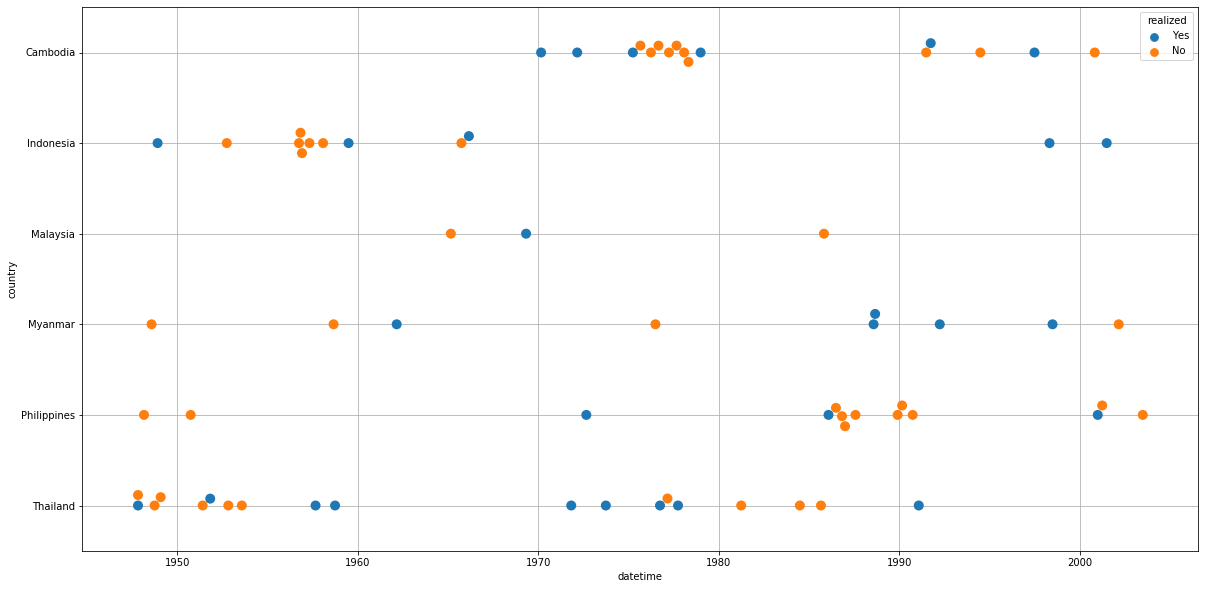

In [139]:
fig, ax = plt.subplots(1,1, figsize=(20, 10))
ax = sns.swarmplot(x="datetime", y="country", data=df_sea, hue="realized", size=10)
plt.grid()

## Save results

In [117]:
df.to_csv('coup_clean.csv')